9.1 빅콘 수정

1. 각 팀마다 '월' 데이터 추가

2. 상대팀 생각x 인 경우도 고려

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터 가져오기

In [2]:
t_bat16=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv",encoding='utf-8',engine='python')
t_bat17=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2017.csv",encoding='utf-8',engine='python')
t_bat18=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2018.csv",encoding='utf-8',engine='python')
t_bat19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv",encoding='utf-8',engine='python')

In [3]:
#모든 열 다 출력하기
pd.options.display.max_columns=None

## 2. 1타(안타-2타-3타-홈런) 변수 만들기

In [4]:
t_bat16['H1']=t_bat16['HIT']-t_bat16['H2']-t_bat16['H3']-t_bat16['HR']
t_bat17['H1']=t_bat17['HIT']-t_bat17['H2']-t_bat17['H3']-t_bat17['HR']
t_bat18['H1']=t_bat18['HIT']-t_bat18['H2']-t_bat18['H3']-t_bat18['HR']
t_bat19['H1']=t_bat19['HIT']-t_bat19['H2']-t_bat19['H3']-t_bat19['HR']

## 3. 월 정보 추가

In [5]:
#월 정보 추가
t_bat16['MONTH']=t_bat16['GDAY_DS'].astype(str).str[4:6]
t_bat17['MONTH']=t_bat17['GDAY_DS'].astype(str).str[4:6]
t_bat18['MONTH']=t_bat18['GDAY_DS'].astype(str).str[4:6]
t_bat19['MONTH']=t_bat19['GDAY_DS'].astype(str).str[4:6]

In [6]:
stats=['PA','AB','RBI','RUN','HIT','H1','H2','H3','HR','SB','CS','SH','SF','BB','IB','HP'
       ,'KK','GD','ERR','LOB','P_AB_CN','P_HIT_CN']

## 4. 직전 기록(1,2,3년 전) 만들기_16,17,18년도

In [7]:
#팀별 기록(16년도)
data16=t_bat16.filter(['T_ID','MONTH']+stats)
t16=data16.groupby(['T_ID','MONTH']).sum()
t16=t16.add_prefix('16_') #각 변수명 앞에 연도 붙이기

#팀별 기록(17년도)
data17=t_bat17.filter(['T_ID','MONTH']+stats)
t17=data17.groupby(['T_ID','MONTH']).sum()
t17=t17.add_prefix('17_') #각 변수명 앞에 연도 붙이기

#팀별 기록(18년도)
data18=t_bat18.filter(['T_ID','MONTH']+stats)
t18=data18.groupby(['T_ID','MONTH']).sum()
t18=t18.add_prefix('18_') #각 변수명 앞에 연도 붙이기

## 5. 내년 기록 만들기(정답 셋 만들기 위함) > AB, HIT, HIT_RATE

In [8]:
#팀별 기록(19년도)
data19=t_bat19.filter(['T_ID','MONTH','AB','HIT'])
t19=data19.groupby(['T_ID','MONTH']).sum()
t19=t19.add_prefix('19_')
t19.head()

19_AB  19_HIT
T_ID MONTH               
HH   03       276      82
     04       699     176
     05       907     219
     06       815     202
     07       655     166

## 6. 학습시킬 데이터 셋 만들기

In [9]:
a=pd.merge(t16,t17,on=['T_ID','MONTH'])
b=pd.merge(a,t18,on=['T_ID','MONTH'])
data=pd.merge(b,t19,on=['T_ID','MONTH'])

In [10]:
data=data.reset_index(level=['MONTH']) #MONTH열을 index에서 값으로 변환
data=data.astype({'MONTH':'int'}) #MONTH 값 형식을 숫자로 변환

In [11]:
data

,MONTH,16_PA,16_AB,16_RBI,16_RUN,16_HIT,16_H1,16_H2,16_H3,16_HR,16_SB,16_CS,16_SH,16_SF,16_BB,16_IB,16_HP,16_KK,16_GD,16_ERR,16_LOB,16_P_AB_CN,16_P_HIT_CN,17_PA,17_AB,17_RBI,17_RUN,17_HIT,17_H1,17_H2,17_H3,17_HR,17_SB,17_CS,17_SH,17_SF,17_BB,17_IB,17_HP,17_KK,17_GD,17_ERR,17_LOB,17_P_AB_CN,17_P_HIT_CN,18_PA,18_AB,18_RBI,18_RUN,18_HIT,18_H1,18_H2,18_H3,18_HR,18_SB,18_CS,18_SH,18_SF,18_BB,18_IB,18_HP,18_KK,18_GD,18_ERR,18_LOB,18_P_AB_CN,18_P_HIT_CN,19_AB,19_HIT
T_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HH,4,912,797,82,88,210,158,36,2,14,8,5,20,4,76,5,15,181,22,24,189,206,50,987,889,102,108,245,183,42,5,15,10,6,14,5,66,2,13,181,20,21,194,226,62,845,753,107,119,210,150,39,2,19,15,10,2,8,67,4,15,168,14,16,150,199,57,699,176
HH,5,1010,879,144,150,254,176,47,4,27,17,5,12,5,102,5,12,170,21,16,194,244,70,1005,879,117,126,257,193,41,2,21,15,8,18,4,78,3,25,173,16,7,216,245,69,949,853,101,115,231,166,37,4,24,11,9,6,7,70,2,13,168,29,11,173,223,58,907,219
HH,6,965,860,120,120,245,175,35,5,30,12,10,11,7,73,3,14,183,19,14,188,224,62,1005,882,150,159,271,179,50,5,37,12,10,16,12,76,2,19,148,25,13,179,223,76,999,891,129,140,239,156,50,3,30,36,13,5,5,83,2,15,213,15,11,179,247,67,815,202
HH,7,877,750,151,155,231,155,43,9,24,11,8,10,10,96,0,11,120,20,10,155,217,76,761,692,94,103,200,131,39,0,30,11,6,9,3,51,1,5,129,20,13,130,166,51,857,779,95,105,224,163,44,2,15,21,7,5,4,57,4,12,194,18,12,161,224,74,655,166
HH,8,962,866,140,153,260,196,38,5,21,12,4,9,4,71,0,12,159,22,18,173,257,85,896,790,113,123,235,166,45,2,22,11,8,14,7,69,3,16,146,15,10,167,218,64,457,399,56,59,107,73,20,1,13,11,8,6,0,41,2,11,76,11,10,80,111,32,812,212
HH,9,936,808,125,133,228,174,32,1,21,3,6,20,9,76,6,23,180,12,18,184,206,67,884,782,96,106,209,144,42,2,21,5,5,13,6,67,3,16,179,16,12,167,202,52,939,851,124,131,236,160,41,0,35,18,10,4,3,65,3,16,186,15,14,168,215,56,718,193
HT,4,867,769,103,107,210,140,43,5,22,15,9,5,4,78,1,11,176,16,16,169,193,54,957,844,131,138,237,172,48,3,14,21,5,11,14,70,3,18,151,19,15,165,239,73,814,729,106,108,211,149,37,1,24,8,6,11,5,57,4,12,126,23,12,154,202,53,779,208
HT,5,998,861,135,149,258,169,52,8,29,24,7,14,9,95,3,19,164,22,15,195,241,70,1076,938,143,147,270,182,53,7,28,4,9,8,8,105,6,17,171,20,17,223,241,72,1044,929,152,161,291,203,49,5,34,18,4,6,8,85,3,16,154,28,17,200,267,83,915,246
HT,6,989,868,134,148,238,161,41,7,29,13,8,12,6,85,2,18,172,16,9,174,223,68,1016,892,182,194,304,204,62,8,30,10,6,6,11,92,2,15,140,20,16,198,264,107,854,749,109,115,203,140,36,3,24,14,4,11,7,73,8,14,143,26,12,146,179,53,842,227


In [12]:
#train, test set만들기
##train(8월까지의 데이터) / test(9월이후 데이터)
train1 = data[data['MONTH']<=7] 
test1 = data[data['MONTH']>7]

In [13]:
train=train1.groupby(['T_ID']).sum()
test=test1.groupby(['T_ID']).sum()

In [14]:
train=train.drop(train.columns[[0]],axis='columns')
test=test.drop(test.columns[[0]],axis='columns')

In [15]:
train['16_HIT_RATE']=train['16_HIT']/train['16_AB']
train['17_HIT_RATE']=train['17_HIT']/train['17_AB']
train['18_HIT_RATE']=train['18_HIT']/train['18_AB']
train['19_HIT_RATE']=train['19_HIT']/train['19_AB']

test['16_HIT_RATE']=test['16_HIT']/test['16_AB']
test['17_HIT_RATE']=test['17_HIT']/test['17_AB']
test['18_HIT_RATE']=test['18_HIT']/test['18_AB']
test['19_HIT_RATE']=test['19_HIT']/test['19_AB']

In [16]:
train

,16_PA,16_AB,16_RBI,16_RUN,16_HIT,16_H1,16_H2,16_H3,16_HR,16_SB,16_CS,16_SH,16_SF,16_BB,16_IB,16_HP,16_KK,16_GD,16_ERR,16_LOB,16_P_AB_CN,16_P_HIT_CN,17_PA,17_AB,17_RBI,17_RUN,17_HIT,17_H1,17_H2,17_H3,17_HR,17_SB,17_CS,17_SH,17_SF,17_BB,17_IB,17_HP,17_KK,17_GD,17_ERR,17_LOB,17_P_AB_CN,17_P_HIT_CN,18_PA,18_AB,18_RBI,18_RUN,18_HIT,18_H1,18_H2,18_H3,18_HR,18_SB,18_CS,18_SH,18_SF,18_BB,18_IB,18_HP,18_KK,18_GD,18_ERR,18_LOB,18_P_AB_CN,18_P_HIT_CN,19_AB,19_HIT,16_HIT_RATE,17_HIT_RATE,18_HIT_RATE,19_HIT_RATE
T_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HH,3764,3286,497,513,940,664,161,20,95,48,28,53,26,347,13,52,654,82,64,726,891,258,3758,3342,463,496,973,686,172,12,103,48,30,57,24,271,8,62,631,81,54,719,860,258,3650,3276,432,479,904,635,170,11,88,83,39,18,24,277,12,55,743,76,50,663,893,256,3076,763,0.286062,0.291143,0.275946,0.248049
HT,3815,3334,514,552,967,653,182,22,110,68,29,43,30,347,7,61,680,72,56,731,875,259,3944,3465,606,635,1061,722,206,21,112,49,23,34,39,342,17,64,607,74,56,758,954,320,3555,3152,468,494,912,641,156,15,100,54,22,34,29,283,17,57,564,94,53,654,821,239,3063,820,0.290042,0.306205,0.289340,0.267711
KT,3641,3198,434,454,870,656,128,5,81,72,35,43,28,341,3,31,593,85,72,674,834,244,3585,3214,374,396,848,598,179,9,62,60,32,46,26,261,7,37,645,80,69,653,810,224,3596,3230,443,466,885,571,176,12,126,55,42,25,16,287,9,38,710,73,58,640,816,209,3198,890,0.272045,0.263846,0.273994,0.278299
LG,3719,3248,471,503,928,688,146,18,76,83,47,42,30,345,8,54,640,51,60,736,888,248,3585,3152,451,478,916,681,148,18,69,58,42,50,38,278,10,67,638,87,52,673,825,255,3782,3388,511,548,1018,710,197,9,102,56,23,32,33,279,11,50,678,91,56,696,904,284,3114,828,0.285714,0.290609,0.300472,0.265896
LT,3778,3295,494,525,957,685,172,17,83,92,40,33,30,373,9,46,690,77,51,746,927,269,3820,3338,449,476,939,667,161,15,96,58,31,56,18,323,22,85,688,106,58,760,900,243,3710,3302,521,539,969,638,188,12,131,38,20,33,26,294,16,55,726,77,71,694,887,257,3145,805,0.290440,0.281306,0.293459,0.255962
NC,3620,3089,522,552,893,614,151,14,114,56,23,46,36,391,11,56,612,78,49,705,861,270,3811,3320,485,513,964,686,179,15,84,57,24,47,35,319,12,90,646,83,66,774,947,277,3609,3228,353,370,802,565,149,10,78,61,23,26,24,273,9,58,745,70,59,674,734,183,3174,901,0.289090,0.290361,0.248451,0.283869
OB,3832,3324,548,593,989,682,181,16,110,60,30,32,40,380,5,56,564,79,45,733,934,277,3804,3339,526,551,987,680,176,15,116,52,20,22,33,351,8,59,608,80,51,760,899,262,3786,3365,567,602,1049,704,196,22,127,54,15,31,38,300,11,52,655,74,38,707,913,292,3112,849,0.297533,0.295597,0.311738,0.272815
SK,3807,3364,484,507,971,670,158,13,130,61,42,43,37,299,10,64,662,74,73,722,830,226,3843,3368,513,532,887,563,142,9,173,37,29,33,27,329,18,86,735,70,52,691,788,211,3600,3164,474,498,889,572,155,10,152,69,28,39,24,304,4,69,684,67,58,676,761,215,3248,885,0.288644,0.263361,0.280973,0.272475
SS,3788,3257,475,517,930,663,158,21,88,74,38,64,38,374,12,55,548,81,49,756,922,261,3826,3412,443,486,917,633,166,25,93,68,26,40,36,287,10,51,667,68,53,709,860,238,3843,3407,479,511,991,708,178,17,88,72,35,40,31,306,9,59,655,81,50,760,933,261,3111,830,0.285539,0.268757,0.290872,0.266795


16년, 17년, 18년 팀별 성적 데이터셋 이용

## 7. 모델학습

In [17]:
# 출력 할 때 마다, 기존 출력물들은 제거해주는 모듈
from IPython.display import clear_output

In [18]:
# 모델 모듈
import xgboost
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [19]:
stats+=['HIT_RATE']

In [20]:
# 누적 및 lag stat features 이름
stats_16 = ['16_' + i for i in stats]
stats_17 = ['17_' +i for i in stats]
stats_18 = ['18_' +i for i in stats]

In [21]:
X_cols=stats_16+stats_17+stats_18
Y_col=['19_HIT_RATE'] #19_AB, 19_HIT

In [22]:
#### 학습시킬 모델
model_dict = {'xgb':XGBRegressor(n_estimators=110, learning_rate=0.05 ,max_depth=3, min_samples_split=400, random_state=23),
    'lgbm':LGBMRegressor(),
    'rf':RandomForestRegressor(),
    'svr':SVR(),
    'knn':KNeighborsRegressor(),
    'reg':LinearRegression(),
    'ridge':Ridge(),
    'lasso':Lasso()}

In [23]:
X_train = train[X_cols]
Y_train = train[Y_col]

X_test = test[X_cols]
Y_test = test[Y_col]

model = model_dict['rf']    #모델명 바꾸어 가면서 실험 가능
weight = train['17_HIT_RATE']
model.fit(X_train, Y_train, sample_weight=weight)
Y_predict = model.predict(X_test)

test_error=mean_squared_error(Y_test, Y_predict, sample_weight=X_test['17_HIT_RATE']) ** 0.5
r2=r2_score(Y_test, Y_predict)
 
    
print("test error : ", np.mean(test_error))
print("r2 : ", np.mean(r2))
print("완료")

test error :  0.020048673821373254
r2 :  -0.09384638796118105
완료


C:\Users\a\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1.xgb
test error :  0.026081045776284183
r2 :  -1.455464097157884

2. lgbm
test error :  0.025701423322913152
r2 :  -1.3700780223303781

3. rf
test error :  0.024501236624416382
r2 :  -1.107598519720283

4. svr
test error :  0.024252745241386542
r2 :  -1.0556272240119156

5. reg
test error :  0.02578681865595002
r2 :  -1.3793945489936916

6. ridge
test error :  0.027661362888329214
r2 :  -1.840388817717325

7. lasso
test error :  0.02734243472311254
r2 :  -1.7674262395617346


### 예측값과 실제값 차이

In [24]:
Y_predict

array([0.2696325 , 0.26918715, 0.2696325 , 0.26946466, 0.26948735,
       0.26919851, 0.26912695, 0.26936365, 0.26987423, 0.26965968])

Text(0,0.5,'예측 값')

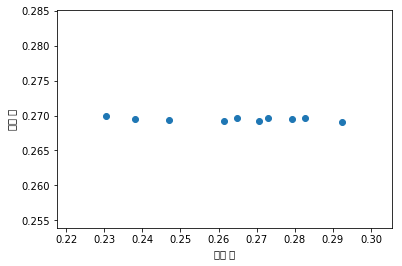

In [25]:
# 예측값과 실제값의 시각화
plt.scatter(Y_test, Y_predict)
plt.xlabel("실제 값")
plt.ylabel("예측 값")

In [26]:
#예측값과 실제값 차이
a=Y_test
a=a.assign(predict=Y_predict)
a['mean19']=a['19_HIT_RATE'].mean()
a['diff1']=abs(a['19_HIT_RATE']-a['predict'])
a

,19_HIT_RATE,predict,mean19,diff1
T_ID,,,,
HH,0.264706,0.269633,0.263961,0.004927
HT,0.261320,0.269187,0.263961,0.007868
KT,0.273035,0.269633,0.263961,0.003403
LG,0.279326,0.269465,0.263961,0.009861
LT,0.238032,0.269487,0.263961,0.031455
NC,0.270519,0.269199,0.263961,0.001320
OB,0.292447,0.269127,0.263961,0.023320
SK,0.246992,0.269364,0.263961,0.022371
SS,0.230508,0.269874,0.263961,0.039366


In [30]:
#차이 합
a['diff1'].sum()

0.15696102502888098

In [ ]:
a.corr(method='pearson')

In [ ]:
a=Y_test
a=a.assign(predict=Y_predict)
a['mean19']=a['19_HIT_RATE'].mean()
a['diff1']=abs(a['19_HIT_RATE']-a['predict']) #예측값과 실제값 차
a['diff2']=abs(a['19_HIT_RATE']-a['mean19']) #실제값과 평균 차
a

In [ ]:
#차이 평균(예측값과 실제값)
a['diff1'].mean()

In [ ]:
#차이 평균(실제값과 실제값 평균)
a['diff2'].mean()

In [ ]:
data16=t_bat16.filter(['T_ID','AB','HIT'])
t16=data16.groupby(['T_ID']).sum()

data17=t_bat17.filter(['T_ID','AB','HIT'])
t17=data17.groupby(['T_ID']).sum()

data18=t_bat18.filter(['T_ID','AB','HIT'])
t18=data18.groupby(['T_ID']).sum()

data19=t_bat19.filter(['T_ID','AB','HIT'])
t19=data19.groupby(['T_ID']).sum()

RATE=pd.DataFrame({'16_HIT_RATE':t16['HIT']/t16['AB'],
     '17_HIT_RATE':t17['HIT']/t17['AB'],
     '18_HIT_RATE':t18['HIT']/t18['AB'],
     '19_HIT_RATE':t19['HIT']/t19['AB']
     })

In [ ]:
RATE['mean']=RATE[['16_HIT_RATE','17_HIT_RATE','18_HIT_RATE']].mean(axis=1)

In [ ]:
RATE['diff']=abs(RATE['19_HIT_RATE']-RATE['mean'])

In [ ]:
RATE['diff'].sum() #3개년 평균과 19년 실제값의 차이합